In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

import numpy as np
from scipy.stats import binom
import seaborn as sb
from numpy import random
import seaborn as sns
from scipy.stats import binom
%matplotlib inline

In [2]:
#sebuah data penilaian real estate di ngra australia
ln = pd.read_csv('Real estate valuation data set.csv')
ln.head(20)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
5,6,2012.667,7.1,2175.03000,3,24.96305,121.51254,32.1
6,7,2012.667,34.5,623.47310,7,24.97933,121.53642,40.3
7,8,2013.417,20.3,287.60250,6,24.98042,121.54228,46.7
8,9,2013.500,31.7,5512.03800,1,24.95095,121.48458,18.8
9,10,2013.417,17.9,1783.18000,3,24.96731,121.51486,22.1


In [40]:
ln.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [32]:
#bentuk ada 414 baris, dan 8 kolom 
ln.shape

(414, 8)

In [33]:
ln.columns

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

In [34]:
#missing value,  |
ln1 = ln.dropna()

In [35]:
#setelah dicek missing valuenya, maka valuenya -> 414 baris, dan 8 kolom
ln1.shape

(414, 8)

In [36]:
#memprediksi harga rumah apakah bisa naik jika
y = ln1['Y house price of unit area']
y

0      37.9
1      42.2
2      47.3
3      54.8
4      43.1
       ... 
409    15.4
410    50.0
411    40.6
412    52.5
413    63.9
Name: Y house price of unit area, Length: 414, dtype: float64

In [8]:
#banyaknya data dari Real estate yaitu ada 414, nilai rata2 1083, 
#di dalam variabel y, dan jika sudah didescribe/digambarkan terdapat 414 nilai, rata2 nilainya di angka 37
#di dalam variabel y std nilainya ada 13 macam
#

y.describe()

count    414.000000
mean      37.980193
std       13.606488
min        7.600000
25%       27.700000
50%       38.450000
75%       46.600000
max      117.500000
Name: Y house price of unit area, dtype: float64

In [9]:
y.std()

13.606487697735314

In [10]:
#lokasi dekat MRT Station, dan toko
features = ['X3 distance to the nearest MRT station','X4 number of convenience stores']
X = ln1[features]
X

,X3 distance to the nearest MRT station,X4 number of convenience stores
0,84.87882,10
1,306.59470,9
2,561.98450,5
3,561.98450,5
4,390.56840,5
...,...,...
409,4082.01500,0
410,90.45606,9
411,390.96960,7
412,104.81010,5


In [11]:
X.describe()

,X3 distance to the nearest MRT station,X4 number of convenience stores
count,414.000000,414.000000
mean,1083.885689,4.094203
std,1262.109595,2.945562
min,23.382840,0.000000
25%,289.324800,1.000000
50%,492.231300,4.000000
75%,1454.279000,6.000000
max,6488.021000,10.000000


# model&fungsi

In [12]:
from sklearn.tree import DecisionTreeRegressor

In [13]:
#membangun model klasifikasi data, yang tujuannya untuk memecah kumpulan data menjadi bagian himpunan yang lebih kecil lagi
ln1_model = DecisionTreeRegressor(random_state=1)

In [14]:
#train model
ln1_model.fit(X, y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1, splitter='best')

In [15]:
#prediksi
ln1_model.predict(X.head())

array([37.9       , 42.2       , 47.5       , 47.5       , 45.18333333])

In [16]:
y.head()

0    37.9
1    42.2
2    47.3
3    54.8
4    43.1
Name: Y house price of unit area, dtype: float64

In [17]:
#evaluasi metric
from sklearn.metrics import mean_absolute_error

In [18]:
y_hat = ln1_model.predict(X)
mean_absolute_error(y, y_hat)

1.4237213886489248

# Training & Testing DataSet


In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [21]:
ln1_model = DecisionTreeRegressor(random_state=1)
ln1_model.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1, splitter='best')

In [22]:
y_hat = ln1_model.predict(X_test)
mean_absolute_error(y_test, y_hat)

6.201856684981686

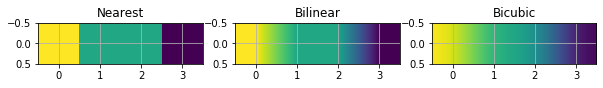

In [43]:
ln1 = np.random.rand(1, 4)

fig, axs = plt.subplots(1, 3, figsize=(10, 3))
for ax, interp in zip(axs, ['nearest', 'bilinear', 'bicubic']):
    ax.imshow(ln1, interpolation=interp)
    ax.set_title(interp.capitalize())
    ax.grid(True)

plt.show()

In [44]:
X_test.head(5)

,X3 distance to the nearest MRT station,X4 number of convenience stores
388,2251.9380,4
102,193.5845,6
187,3078.1760,0
162,4066.5870,0
90,274.0144,1


In [45]:
y_test.head(5)

388    27.3
102    54.4
187    22.0
162    11.6
90     45.4
Name: Y house price of unit area, dtype: float64

In [41]:
import bqplot.pyplot as plt

ModuleNotFoundError: No module named 'bqplot'